In [1]:
import os
import pickle
import openslide
from tqdm import tqdm
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from pathlib import Path
from utils.utils import (
    detect_tissue_regions,
    get_BrightandDark_perc,
    interpolate,
    generate_patches_from_wsi,
)
from utils.init import create_directories

create_directories()

vis_scale = 0.007
enlarge = 20
perc_wpx = 0.85
perc_bpx = 0.05
real_enlarge = int(enlarge / vis_scale)
patches_path = "../data/patches/"
coords_path = "../checkpoints/coords_pickles"
overview_path = "../results/overview_wsis"

## Paul-Brousse

In [2]:
step_pb = 1152
patch_size_pb = 1152
path_to_PB_wsis = "../data/WSIs/PB"
slides = [
    e + "/" + f
    for e in os.listdir(f"{path_to_PB_wsis}")
    for f in os.listdir(f"{path_to_PB_wsis}/{e}")
    if ".mrxs" in f
]
slides.sort()
slides.reverse()
print(slides)

['Patient_222/222C.mrxs', 'Patient_222/222B.mrxs', 'Patient_222/222A.mrxs']


Patient_222/222C.mrxs ...
(105472, 227840)


Patch extraction:  64%|██████▍   | 5146/8019 [02:37<01:27, 32.76it/s]


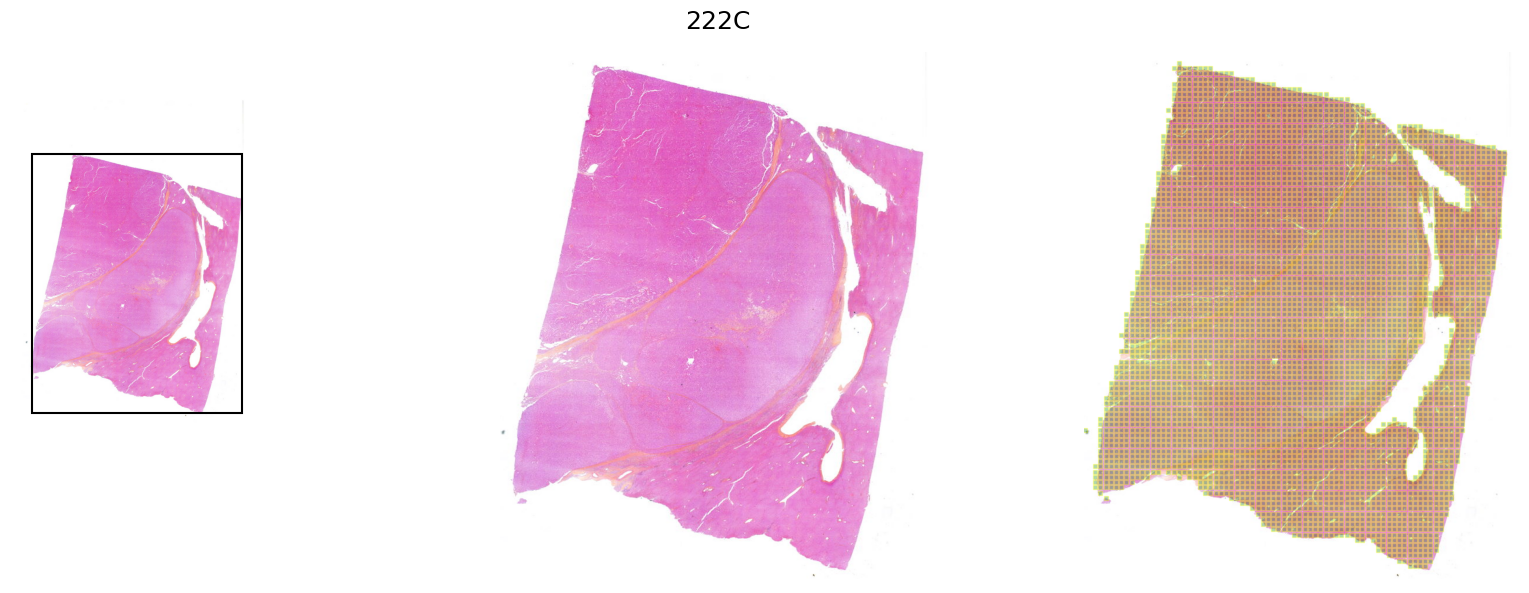

222C done!


In [3]:
for slide_name in slides[:1]:
    print(slide_name, "...")
    generate_patches_from_wsi(
        slide_name,
        path_to_wsi=path_to_PB_wsis,
        patch_size=patch_size_pb,
        step=step_pb,
        path_to_patches=patches_path,
        vis_scale=vis_scale,
        overview_path=overview_path,
        coords_path=coords_path,
    )

## Henri-Mondor

In [4]:
patch_size_hm = interpolate(patch_size_pb, 0.25, 0.46)
print(patch_size_hm)
step_hm = patch_size_hm

path_to_HM_wsis = "../data/WSIs/HM"
slides = [
    e + "/" + f
    for e in os.listdir(f"{path_to_HM_wsis}")
    for f in os.listdir(f"{path_to_HM_wsis}/{e}")
    if ".ndpi" in f and "ndpa" not in f
]
slides.sort()
slides.reverse()
print(slides)

626
['Patient_111/111C.ndpi', 'Patient_111/111B.ndpi', 'Patient_111/111A.ndpi']


In [ ]:
for slide_name in slides[1:]:
    print(slide_name, "...")
    generate_patches_from_wsi(
        slide_name,
        path_to_wsi=path_to_HM_wsis,
        patch_size=patch_size_hm,
        step=step_hm,
        path_to_patches=patches_path,
        vis_scale=vis_scale,
        overview_path=overview_path,
        coords_path=coords_path,
    )

## Beaujon

In [6]:
patch_size_bj = interpolate(patch_size_pb, 0.25, 0.263102)
print(patch_size_bj)
step_bj = patch_size_bj
path_to_BJ_wsis = "../data/WSIs/BJ"
slides = [
    e + "/" + f
    for e in os.listdir(f"{path_to_BJ_wsis}")
    for f in os.listdir(f"{path_to_BJ_wsis}/{e}")
    if "svs" in f
]
slides.sort()
slides.reverse()
print(slides)

1094
['Patient_161/161B.svs', 'Patient_161/161A.svs']


Patient_161/161B.svs ...
(112599, 88177)


Patch extraction:  70%|███████   | 4794/6808 [04:51<02:02, 16.46it/s]


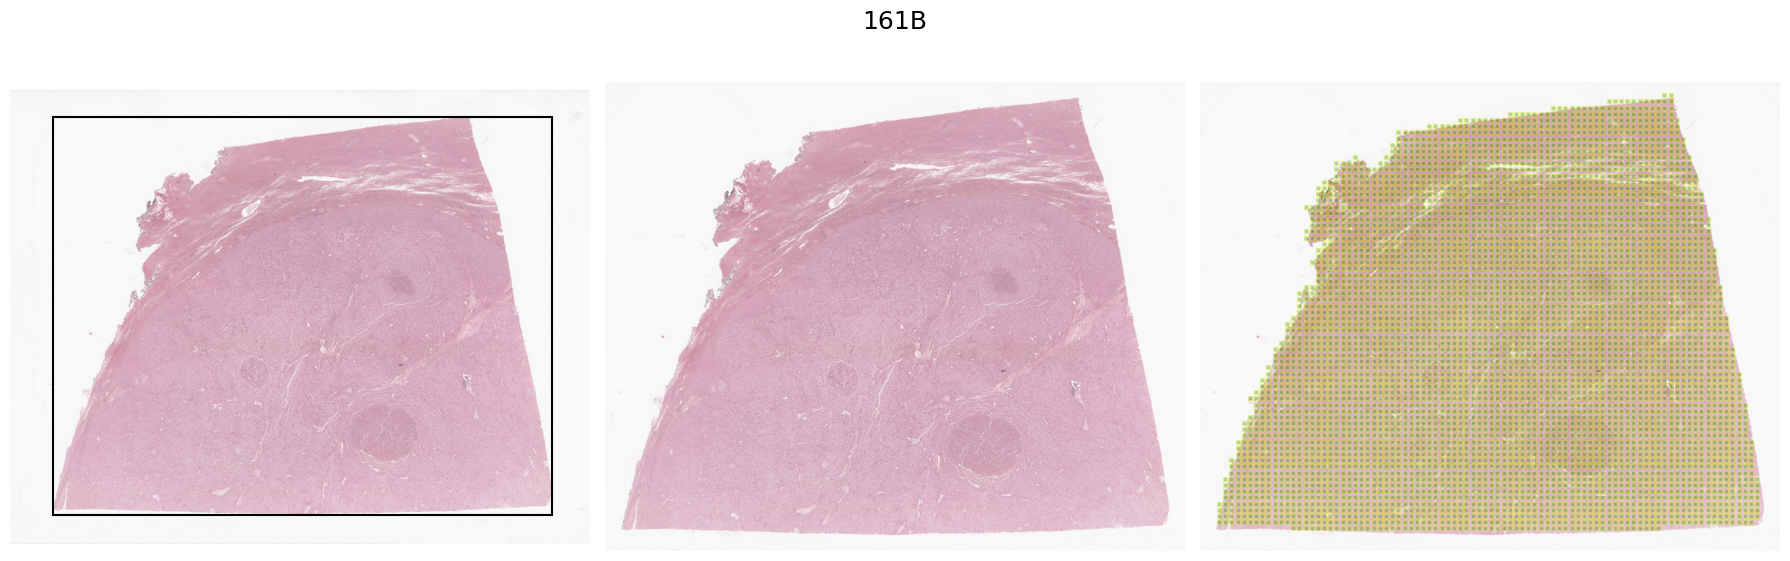

161B done!


In [7]:
for slide_name in slides[:1]:
    print(slide_name, "...")
    generate_patches_from_wsi(
        slide_name,
        path_to_wsi=path_to_BJ_wsis,
        patch_size=patch_size_bj,
        step=step_bj,
        path_to_patches=patches_path,
        vis_scale=vis_scale,
        overview_path=overview_path,
        coords_path=coords_path,
    )